# Notes for Think Stats by Allen B. Downey

In [1]:
from typing import List

import numpy as np
import pandas as pd
from scipy import stats

% matplotlib inline

## Chapter 01

### Glossary

- anecdotal evidence - is an evidence based on personal experience rather than based on well-designed and scrupulous study. 
- cross-sectional study - is a study that colllects data about a population at a particular point in time.
- longitudinal study - is a study that follow the same group repeatedly and collects the data over time.

## Chapter 02

#### Mean - central tendency

$$ \overline{x} = \frac{1}{n} \sum_i x_i \ $$

In [2]:
sample = [1, 3, 5, 6]

In [3]:
np.mean(sample)

3.75

In [4]:
pd.DataFrame(sample).mean()

0    3.75
dtype: float64

#### Variance

$$ S^2 = \frac{1}{n} \sum_i (x_i - \overline{x})^2 $$

In [5]:
np.var(sample)

3.6875

In [6]:
# Warning! Pandas variance by default is normalized by N-1!
# That can be changed by using ddof(delta degrees of freedom) = 0
pd.DataFrame(sample).var(ddof = 0)

0    3.6875
dtype: float64

#### Standard Deviation

$$ \sigma = \sqrt{S^{2}} $$ 

In [7]:
np.std(sample)

1.920286436967152

In [8]:
# Warning! Pandas std is calculated with variance by N-1!
# That can be changed by using ddof(delta degrees of freedom) = 0
pd.DataFrame(sample).std(ddof = 0)

0    1.920286
dtype: float64

#### Effect size - Cohen'd

Having groups **G1** and **G2**, with number of elements given as **N1** and **N2**, the effect size is given as:

$$ Cohen'd = \frac{\overline{G1} - \overline{G2}}{\sqrt{(\sigma (G1) \cdot (N1-1) + \sigma (G2) \cdot (N2-1)) / ((N1-1) + (N2-1))}} $$

In [9]:
def effect_size(g1: pd.DataFrame, g2: pd.DataFrame) -> float:
    diff = g1.mean() - g2.mean()
    var_g1, var_g2 = g1.var(ddof=1), g2.var(ddof=1)
    n1, n2 = len(g1), len(g2)
    
    pooled_var = (var_g1 * (n1 - 1) + var_g2 * (n2 - 1)) / ((n1 - 1) + (n2 - 1))
    cohen_d = diff / np.sqrt(pooled_var)
    return cohen_d

It is calculated with delta degree of freedom = 1!

In [10]:
effect_size(pd.DataFrame([1, 2, 3, 4]), pd.DataFrame([3, 3, 1, 2]))

0    0.219971
dtype: float64

## Chapter 03

#### Probability Mass Function

Probability mass function maps each value to its probability.
Probability of a group always adds to one.

In [11]:
s = pd.Series([1, 2, 3, 4, 2])

In [12]:
def pmf(series: pd.Series) -> pd.Series:
    return series.value_counts().sort_index() / series.count()

In [13]:
pmf(s)

1    0.2
2    0.4
3    0.2
4    0.2
dtype: float64

#### DataFrame Indexing

In [14]:
array = np.random.randn(4, 2)
array

array([[ 0.72464651, -0.5027409 ],
       [-0.52156676, -0.66086987],
       [-0.04262088, -0.08639629],
       [ 0.94827375,  0.12885289]])

In [15]:
df = pd.DataFrame(array)
df

,0,1
0,0.724647,-0.502741
1,-0.521567,-0.660870
2,-0.042621,-0.086396
3,0.948274,0.128853


In [16]:
columns = ['A', 'B']
df = pd.DataFrame(data=array,
                  columns=columns)
df

,A,B
0,0.724647,-0.502741
1,-0.521567,-0.660870
2,-0.042621,-0.086396
3,0.948274,0.128853


In [17]:
index = ['a', 'b', 'c', 'd']
df = pd.DataFrame(data=array,
                  columns=columns,
                  index=index)
df

,A,B
a,0.724647,-0.502741
b,-0.521567,-0.660870
c,-0.042621,-0.086396
d,0.948274,0.128853


In [18]:
df['A']

a    0.724647
b   -0.521567
c   -0.042621
d    0.948274
Name: A, dtype: float64

In [19]:
df.loc['a']

A    0.724647
B   -0.502741
Name: a, dtype: float64

In [20]:
df.iloc[0]

A    0.724647
B   -0.502741
Name: a, dtype: float64

In [21]:
indices = ['a', 'c']
df.loc[indices]

,A,B
a,0.724647,-0.502741
c,-0.042621,-0.086396


In [22]:
df['a':'c']

,A,B
a,0.724647,-0.502741
b,-0.521567,-0.660870
c,-0.042621,-0.086396


In [23]:
df[0:2]

,A,B
a,0.724647,-0.502741
b,-0.521567,-0.660870


In [24]:
df[:2]

,A,B
a,0.724647,-0.502741
b,-0.521567,-0.660870


In [25]:
df['A'].loc['a']

0.7246465095750567

## Chapter 04

#### Percentile Rank

Percentile rank is a metric that presents how big is the subset of the data that the values in the subset
are equal or below any given value.

In [26]:
# Data
a = [1, 2, 3, 3, 4, 5]

In [27]:
stats.percentileofscore(a=a, score=2.5)

33.33333333333333

In [28]:
stats.percentileofscore(a=a, score=2)

33.33333333333333

In [29]:
stats.percentileofscore(a=a, score=3)

58.333333333333336

#### Percentile

Percentile is the opposite operation to percentile rank - it maps a percentile rank to a value.

In [30]:
np.percentile(a=a, q=50)

3.0

In [31]:
np.percentile(a=a, q=70)

3.5

In [32]:
# Pandas uses quantiles with different interpolation methods.
pd.DataFrame(data=a).quantile(q=0.5)

0    3.0
Name: 0.5, dtype: float64

#### Cumulative Distribution Function

Cumulative Distribution Function is the function that maps from a value to its percentile rank.

In [33]:
series = pd.Series(np.random.randn(25))

In [34]:
series.head()

0   -0.656984
1   -0.075014
2   -1.072178
3    0.199950
4   -1.914657
dtype: float64

In [35]:
cdf = series.value_counts().sort_index().cumsum()

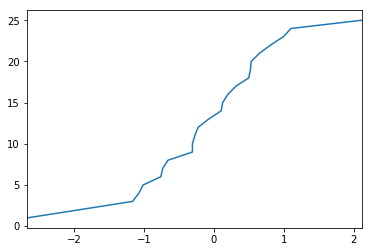

In [36]:
cdf.plot()

It can be plotted using .hist()

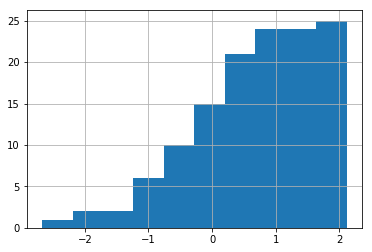

In [37]:
series.hist(cumulative=True)

#### Interquartile Range

Interquartile range is the difference between the 7th and 25th percentiles.
It is used as a measure of the spread of a distribution.